# Tensorflow 2 Keras Model (35분27초)



Keras에서 모델을 만드는 방법은 크게 [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model)를 이용하는 방법과 [Functional API](https://www.tensorflow.org/guide/keras/functional)를 이용하는 방법이 있습니다.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D

In [ ]:
gpu_growth = False

if gpu_growth:
    physical_devices = tf.config.list_physical_devices('GPU')
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass

## Sequantial API

`Sequential` API는 각 레이어에 **정확히 하나의 입력 텐서와 하나의 출력 텐서**가 있는 **일반 레이어 스택**에 적합합니다.  
다음과 같이 모델을 만들 수 있습니다.

In [5]:
# list에 layer를 차례대로 넣습니다
model_seq1 = tf.keras.Sequential([
    Dense(100, input_shape=(28,28)),
    Dense(200),
    Dense(300)
])

다음과 같이 `add` 메서드를 이용해서 하나씩 레이어를 추가할 수 있습니다.

In [9]:
model_seq2 = tf.keras.Sequential()
model_seq2.add(Dense(100 ,input_shape=(28,28)))
model_seq2.add(Dense(200))
model_seq2.add(Dense(300))

In [8]:
model_seq1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 28, 100)           2900      
                                                                 
 dense_7 (Dense)             (None, 28, 200)           20200     
                                                                 
 dense_8 (Dense)             (None, 28, 300)           60300     
                                                                 
Total params: 83,400
Trainable params: 83,400
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_seq2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 28, 100)           2900      
                                                                 
 dense_11 (Dense)            (None, 28, 200)           20200     
                                                                 
 dense_12 (Dense)            (None, 28, 300)           60300     
                                                                 
Total params: 83,400
Trainable params: 83,400
Non-trainable params: 0
_________________________________________________________________


## Functional API
`Functional` API는 `Sequential`API보다 더 유연한 모델을 만들 수 있습니다. 위에서 만든 모델을 `Functional` API를 이용해서 만들어 보겠습니다.

In [ ]:
inputs = Input(shape=(784)) #먼저 Input layer를 만듭니다. shape는 임의로 설정했습니다.
x = Dense(100)(inputs) # 각 layer의 output을 다음 layer의 input으로 넣어주면 됩니다.
x = Dense(200)(x)
outputs = Dense(300)(x)
model_func = tf.keras.Model(inputs=inputs, outputs=outputs) #마지막엔 tf.keras.Model을 이용합니다.

이번에는 다양한 구조의 모델을 `Functional` API를 이용해서 만들어 보겠습니다.

### Residual connection (Skip connection)

residual connection은 특정 layer의 output이 이후의 몇개 layer를 통과하지 않고 우회하는 connection입니다.

In [3]:
inputs = Input(shape=(28, 28, 1))
#code
x = Conv2D(filters=10, kernel_size=(3,3), padding='same')(inputs)
shortcut = x
x = Conv2D(filters=20, kernel_size=(3,3), padding='same')(x)
x = Conv2D(filters=10, kernel_size=(3,3),padding='same')(x)

outputs = Add()([x,shortcut])
model_res = tf.keras.Model(inputs=inputs, outputs= outputs)

In [19]:
!pip install pydot pydotplus graphviz #then kernel restart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


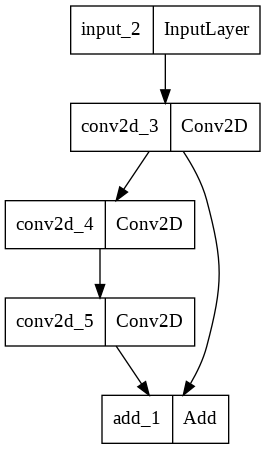

In [4]:
tf.keras.utils.plot_model(model_res)

### Multiple inputs / outputs

특정 layer의 output을 여러 layer가 동시에 input으로 이용하는 경우, 여러 layer의 output이 하나의 layer의 input으로 들어가는 경우도 가능합니다.

In [5]:
inputs = Input(shape=(28, 28, 1))
#code
x1 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(inputs)

x1_1 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x1)
x2_1 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x1)
x3_1 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x1)

x1_2 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x1_1)
x2_2 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x2_1)
x3_2 = Conv2D(filters=10, kernel_size=(3,3), padding='same')(x3_1)

x = Concatenate(axis=-1)([x1_2,x2_2,x3_2])



x = Flatten()(x)
outputs = Dense(10)(x)
model_multi = tf.keras.Model(inputs=inputs, outputs=outputs) 

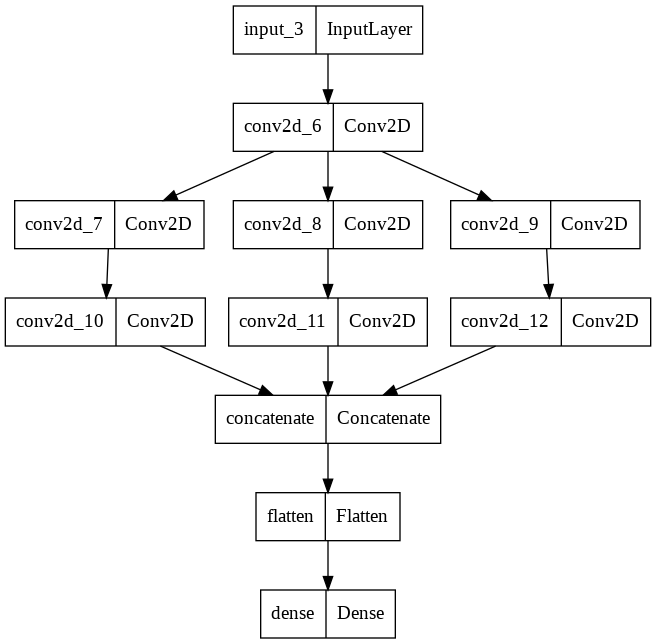

In [6]:
tf.keras.utils.plot_model(model_multi)

### Sharing layer

두 개의 모델이 특정 layer를 공유할 수도 있습니다.

In [7]:
# 공유할 layer
layer_share = Conv2D(filters=10, kernel_size=(3,3))


# Model 1
inputs1 = Input(shape=(28, 28, 1))

x1 = Conv2D(filters=10, kernel_size=(3,3))(inputs1)
x1 = layer_share(x1)
x1 = Conv2D(filters=10, kernel_size=(3,3))(x1)
outputs1 = Conv2D(filters=10, kernel_size=(3,3))(x1)
model1 = tf.keras.Model(inputs=inputs1, outputs=outputs1)


# Model 2
inputs2 = Input(shape=(32, 32, 3))
x2 = Conv2D(filters=10, kernel_size=(3,3))(inputs2)
x2 = layer_share(x2)
outputs2 = Conv2D(filters=10, kernel_size=(3,3))(x2)
model2 = tf.keras.Model(inputs=inputs2, outputs=outputs2)

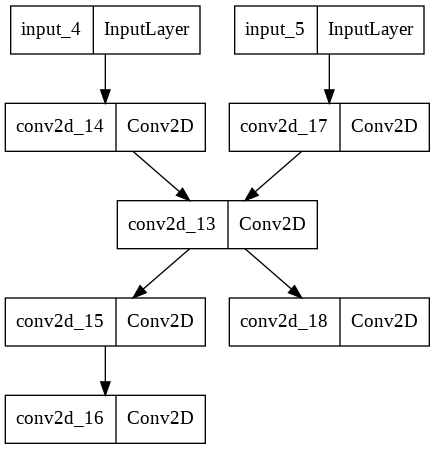

In [8]:
model = tf.keras.Model(inputs=[inputs1, inputs2], outputs=[outputs1, outputs2])
tf.keras.utils.plot_model(model)

이와 같이 `Functional` API를 이용하면 모델을 유연하게 만들 수 있습니다.

# 실습: ResNet-34 구현

다음은 [ResNet-34](https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) 모델의 구조이다. `ResBlock`함수를 작성한 다음 `ResNet34`함수를 이용하여 ResNet-34를 구현해보자.

<img src="https://user-images.githubusercontent.com/37704174/108679234-904fe580-752f-11eb-8ebe-a2c08e029543.JPG" width="200" height="200" />


- Hint: 점선으로 된 residual connection은 shape를 맞춰주기 위해 convolution layer 하나를 통과시켜 주어야 한다(projection shortcut). 즉, 실제로는 다음과 같이 구성된다.

<img src="https://user-images.githubusercontent.com/37704174/108679932-8da1c000-7530-11eb-92b1-ef56fad3e153.png" width="200" height="200" align="middle" />

- `padding="same"`

In [9]:
def ResBlock(x, filters, strides=1):
    ##################
    # Your code here
    ##################
    shortcut = x

    if strides != 1:
        shortcut = Conv2D(filters=filters, kernel_size=(3,3), strides = strides, padding='same')(shortcut)
    
    x = Conv2D(filters=filters, kernel_size=(3,3), strides = strides, padding='same')(x)
    x = Conv2D(filters=filters, kernel_size=(3,3), strides = 1, padding='same')(x)

    x = Add()([x,shortcut])    
    return x

In [11]:
def ResNet34():
    inputs = Input(shape=(224, 224, 3))
    ##################
    # Your code here
    ##################

    x = Conv2D(filters=64, strides=2, kernel_size=(7,7), padding='same')(inputs)
    x = MaxPooling2D(pool_size=2, strides=2)(x)

    x = ResBlock(x, 64 )
    x = ResBlock(x, 64 )
    x = ResBlock(x, 64 )

    x = ResBlock(x, 128, 2)
    x = ResBlock(x, 128 )
    x = ResBlock(x, 128 )
    x = ResBlock(x, 128 )

    x = ResBlock(x, 256, 2)
    x = ResBlock(x, 256 )
    x = ResBlock(x, 256 )
    x = ResBlock(x, 256 )
    x = ResBlock(x, 256 )
    x = ResBlock(x, 256 )

    x = ResBlock(x, 512, 2)
    x = ResBlock(x, 512 )
    x = ResBlock(x, 512 )

    x = GlobalAveragePooling2D()(x)
    x = Dense(1000)(x)




    

    

    outputs = Dense(1000)(x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [12]:
resnet34 = ResNet34()

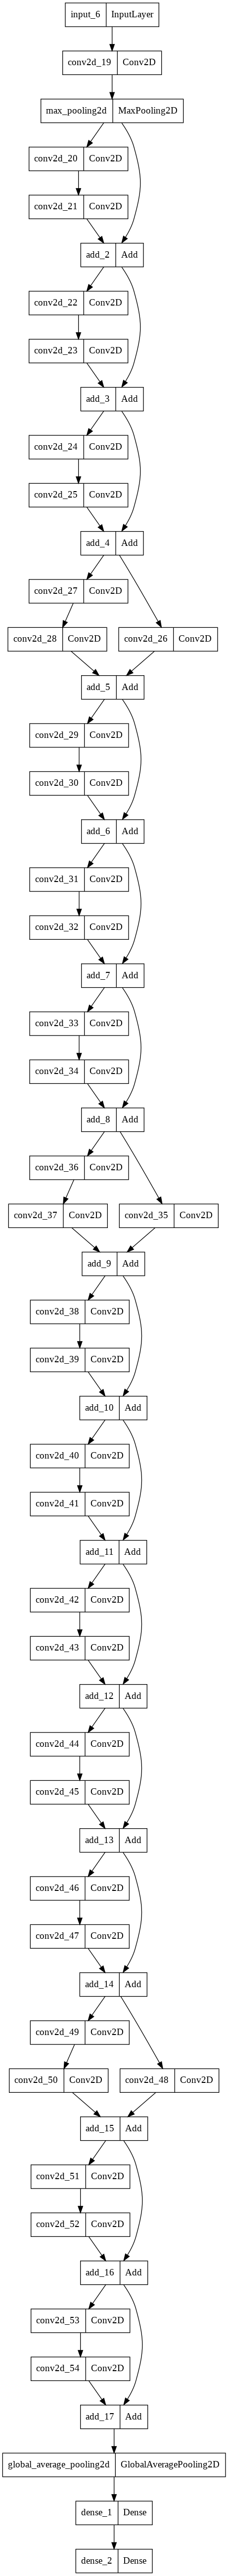

In [13]:
tf.keras.utils.plot_model(resnet34)